<a href="https://colab.research.google.com/github/sidharth-ds/Uber-Rides-analysis-project/blob/main/Uber_Rides_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/uber-raw-data-sep14.csv")
data

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [ ]:
data.shape

(1028136, 4)

### Data cleaning:

In [ ]:
# converting datetime into dataframe format
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime) 
data.head()

,Date/Time,Lat,Lon,Base
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512


### Creating new_Columns from Date/time:

In [ ]:
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())
data["Day"] = data["Date/Time"].apply(lambda x: x.day)
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)

data

,Date/Time,Lat,Lon,Base,Weekday,Day,Hour
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,0,1,0
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,0,1,0
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,0,1,0
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,0,1,0
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,0,1,0
...,...,...,...,...,...,...,...
1028131,2014-09-30 22:57:00,40.7668,-73.9845,B02764,1,30,22
1028132,2014-09-30 22:57:00,40.6911,-74.1773,B02764,1,30,22
1028133,2014-09-30 22:58:00,40.8519,-73.9319,B02764,1,30,22
1028134,2014-09-30 22:58:00,40.7081,-74.0066,B02764,1,30,22


# VISUALIZATIONS:

### Uber trips for the September month (09-2014):

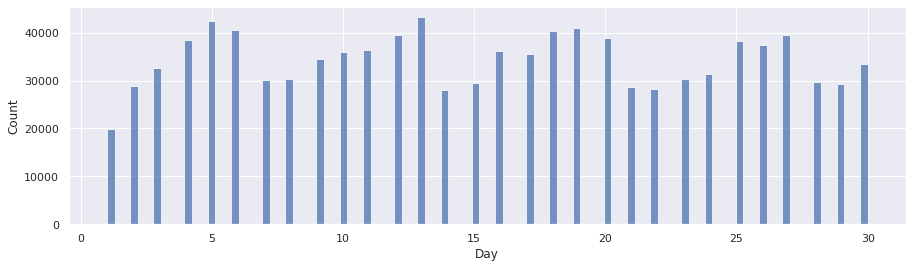

In [ ]:
plt.figure(figsize=(15,4))
sns.histplot(data["Day"])

INTERPRETATION of the above:
  * By looking at the daily trips we can say that the Uber trips are rising on the "working days" and decreases on the "weekends".

### Uber trips according to the hours:

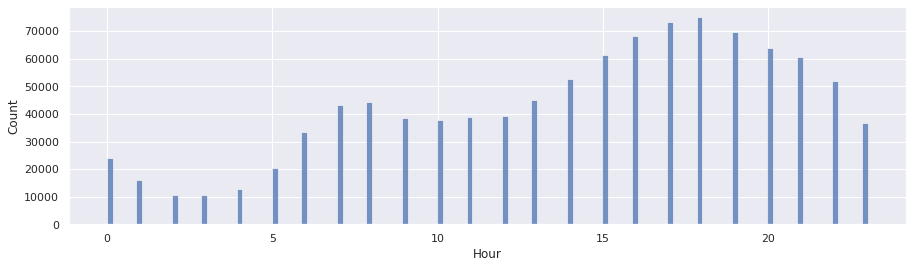

In [ ]:
plt.figure(figsize=(15,4))
sns.histplot(data["Hour"])

INTERPRETATION of the above:
  * According to the hourly data, the Uber trips decreases after midnight and then start increasing after 5 am.  
  * The trips keep rising till 6 pm such that 6 pm is the busiest hour for Uber then the trips start decreasing.

### Uber trips according to the weekdays:

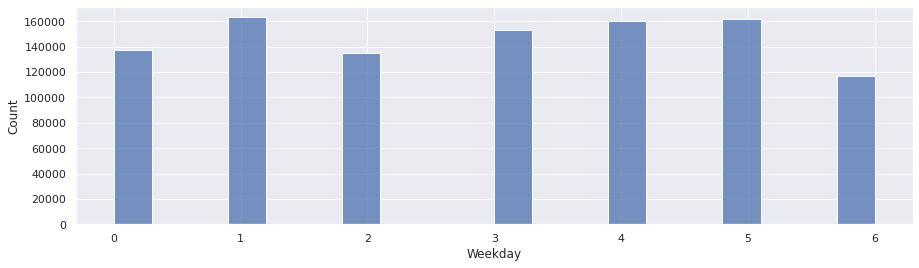

In [ ]:
plt.figure(figsize=(15,4))
sns.histplot(data["Weekday"],binwidth=0.3)

INTERPRETATION of the above:
  * on Sundays(0) the Uber trips are more than Saturdays(6) 
  * so we can say people also use Uber for outings rather than for just going to work. 
  * On Saturdays, the Uber trips are the lowest and on Mondays, they are the highest.

### Correlation of hours and weekdays on the Uber trips:

In [ ]:
# Correlation of Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply(lambda x: len(x))   # len(x) : no of rides in that hour
df

Weekday  Hour
0        0       1885
         1       1201
         2        977
         3       1780
         4       2479
                 ... 
6        19      6430
         20      5930
         21      5164
         22      4115
         23      2326
Length: 168, dtype: int64

In [ ]:
df = df.unstack()
df

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Weekday,,,,,,,,,,,,,,,,,,,,,
0,1885,1201,977,1780,2479,3905,5668,7223,7287,5892,...,7113,8346,9513,9841,9611,8725,8318,6979,5130,2936
1,1411,784,609,1221,2093,4196,7393,9466,9374,7082,...,8374,9935,11108,12369,12184,11091,10370,9022,6538,2956
2,1489,885,597,966,1612,3130,5699,7067,6665,5356,...,6867,8331,9451,10294,10250,9268,9108,7951,6179,3408
3,1762,1037,714,1088,1720,2754,5586,7790,7663,6330,...,7419,8887,10196,11302,11738,10958,10076,9820,7885,5164
4,2513,1530,1002,1347,1819,3115,5186,6698,6715,5615,...,7431,8696,9792,11175,12315,11765,10345,10947,10797,9366
5,6909,4737,2957,2029,1458,1544,2092,2790,3664,4352,...,8732,9857,10494,11021,11753,11423,9841,10723,11173,10412
6,8164,5933,3846,2358,1494,1618,1683,2280,3109,3915,...,6707,7167,7670,7371,7189,6430,5930,5164,4115,2326


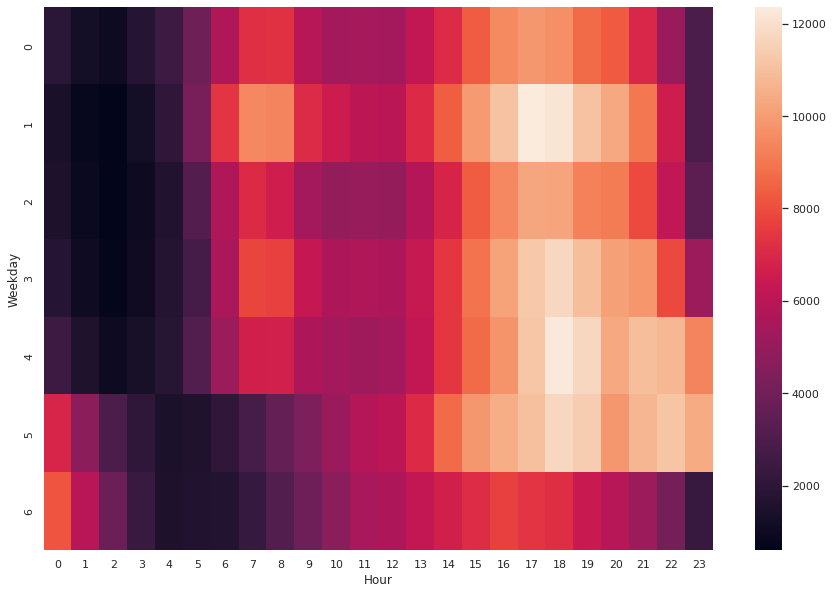

In [ ]:
sns.heatmap(df, annot=False)

Interpretation:
  * rides are maximum at around 6pm
  * minimum at around 1am to 3am

### As we are having the data about longitude and latitude so we can also plot the density of Uber trips according to the regions of the New Your city:

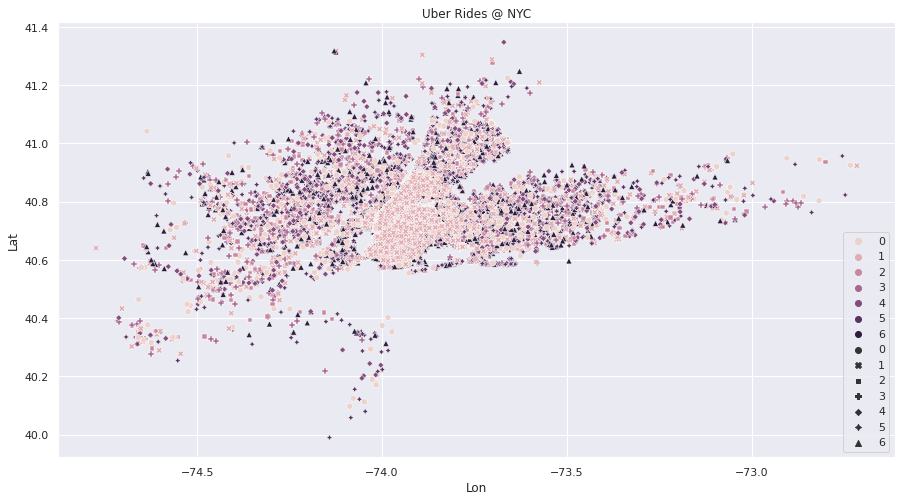

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=data, x="Lon", y="Lat", style ='Weekday', hue = 'Weekday')

plt.title("Uber Rides @ NYC")
plt.legend()
plt.show()

interpretation of the above:
  * rides are more concentrated within NYC

SUMMARY:
* Day wise:
  * Monday is the most profitable day for Uber
  * On Saturdays less number of people use Uber
* Hour wise:
  * 6 pm is the busiest day for Uber
  * On average a rise in Uber trips start around 5 am.
* Weekday Wise:
  * Uber trips increase during weekdays, decline during weekends